# Assignment 5 : Multi Linear Regression - Toyota Corolla data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [123]:
#Read the data
cars = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [124]:
cols = [2,3,6,8,12,13,15,16,17]
df = cars[cars.columns[cols]]


In [125]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [127]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [128]:
#check for missing values
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correlation Matrix

In [129]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

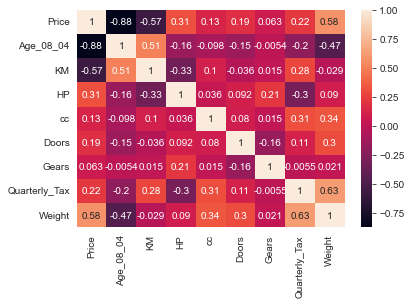

In [130]:
sns.heatmap(df.corr(),annot=True)

# Scatterplot between variables along with histograms

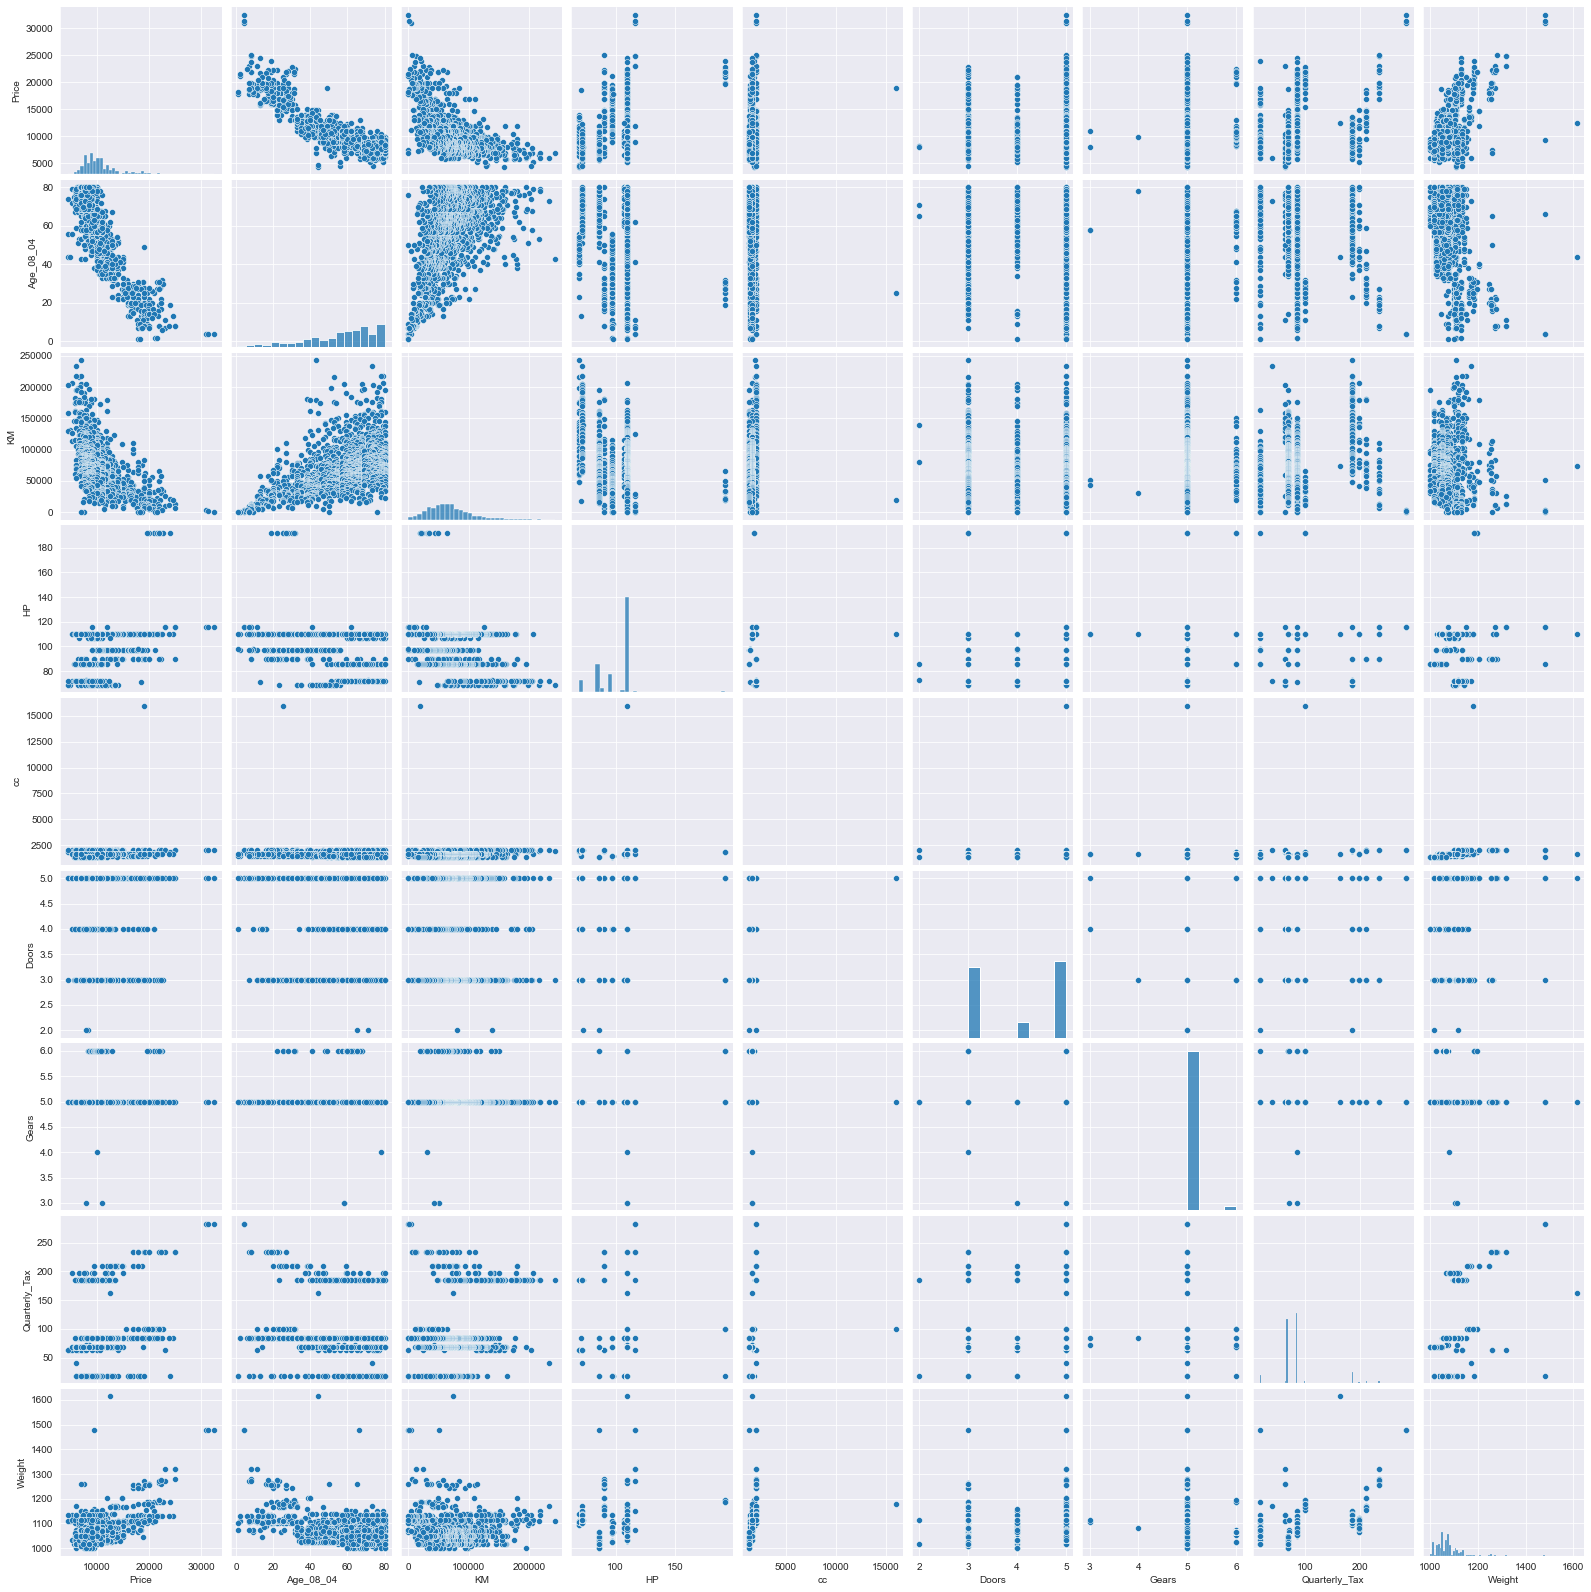

In [131]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [132]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [133]:
#Coefficients
model.params

Intercept       -3951.758002
Age_08_04        -145.391963
HP                 41.039595
cc                 -0.228177
Doors             -21.344280
Gears             348.585840
Quarterly_Tax      -1.531133
Weight             16.297461
dtype: float64

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1051.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:00:36   Log-Likelihood:                -12503.
No. Observations:                1436   AIC:                         2.502e+04
Df Residuals:                    1428   BIC:                         2.506e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3951.7580   1537.751     -2.570      0.010   -6968.251    -935.265
Age_08_04      -145.3920      2.393    -60.746      0.000    -150.087    -140.697
HP               41.0396      3.016     13.607      0.000      35.123      46.956
cc               -0.2282      0.098     -2.325      0.020      -0.421      -0.036
Doors           -21.3443     43.673     -0.489      0.625    -107.013      64.325
Gears           348.5858    214.606      1.624      0.105     -72.390     769.562
Quarterly_Tax    -1.5311      1.385     -1.106      0.269      -4.247       1.185
Weight           16.2975      1.166     13.983      0.000      14.011      18.584
==============================================================================
Omnibus:                      128.064   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.771
Skew:                          -0.187   Prob(JB):                    1.51e-153
Kurtosis:                       6.409   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#t and p-Values
print(model.pvalues)

Intercept        1.027553e-02
Age_08_04        0.000000e+00
HP               9.681999e-40
cc               2.020891e-02
Doors            6.251045e-01
Gears            1.045305e-01
Quarterly_Tax    2.690087e-01
Weight           9.792205e-42
dtype: float64


In [136]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8373861523558435, 0.8365890256517055)

# Simple Linear Regression Models

In [137]:
ml_v=smf.ols('Price~Doors',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [138]:
ml_w=smf.ols('Price~Gears',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [139]:
ml_w=smf.ols('Price~Quarterly_Tax',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [140]:
ml_wv=smf.ols('Price~Doors+Gears+Quarterly_Tax',data = df).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept       -0.975855
Doors            6.911356
Gears            3.617049
Quarterly_Tax    7.862548
dtype: float64 
 Intercept        3.293011e-01
Doors            7.204120e-12
Gears            3.083310e-04
Quarterly_Tax    7.352504e-15
dtype: float64


# Calculating VIF

In [141]:
rsq_door = smf.ols('Doors~Gears+Quarterly_Tax+Age_08_04+HP+cc+Weight',data=df).fit().rsquared  
vif_Doors = 1/(1-rsq_door) # 16.33

rsq_gears = smf.ols('Gears~Doors+Quarterly_Tax+Age_08_04+HP+cc+Weight',data=df).fit().rsquared  
vif_Gears = 1/(1-rsq_gears) # 564.98

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Doors+Gears+Age_08_04+HP+cc+Weight',data=df).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) #  564.84

rsq_Age_08_04 = smf.ols('Age_08_04~Doors+Quarterly_Tax+Gears+HP+cc+Weight',data=df).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) #  16.35

rsq_HP = smf.ols('HP~Doors+Quarterly_Tax+Gears+Age_08_04+cc+Weight',data=df).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Doors+Quarterly_Tax+Gears+HP+Age_08_04+Weight',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Weight = smf.ols('Weight~Doors+Quarterly_Tax+Gears+HP+cc+Age_08_04',data=df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Weight','Doors','Quarterly_Tax','Gears','HP','cc','Age_08_04'],'VIF':[vif_Weight,vif_Doors,vif_Quarterly_Tax,vif_Gears,vif_HP,vif_cc,vif_Age_08_04]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Weight,2.512929
1,Doors,1.155557
2,Quarterly_Tax,2.165018
3,Gears,1.092539
4,HP,1.362771
5,cc,1.157943
6,Age_08_04,1.322996


# Residual Analysis

In [142]:
X = df.drop("Price",axis=1)
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [143]:
df["Price"] - model.predict(X)

0      -2785.336644
1      -2535.336644
2      -2189.944680
3       -899.160754
4      -1599.080204
           ...     
1431     -27.117053
1432    3917.033443
1433    1426.641480
1434      31.249517
1435   -1960.212593
Length: 1436, dtype: float64

In [144]:
model.resid.min()

-9057.300075127187

## Test for Normality of Residuals (Q-Q Plot)

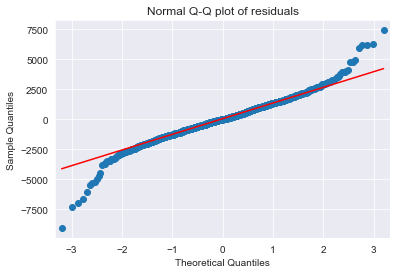

In [145]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [146]:
list(np.where(model.resid>6000))

[array([109, 111, 147, 523], dtype=int64)]

In [147]:
list(np.where(model.resid<-6000))

[array([191, 192, 221, 601, 960], dtype=int64)]

## Residual Plot for Homoscedasticity

In [148]:
model.fittedvalues

0       16285.336644
1       16285.336644
2       16139.944680
3       15849.160754
4       15349.080204
            ...     
1431     7527.117053
1432     6927.966557
1433     7073.358520
1434     7218.750483
1435     8910.212593
Length: 1436, dtype: float64

In [149]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

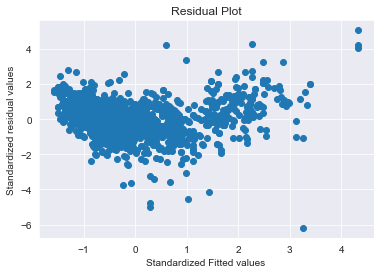

In [150]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


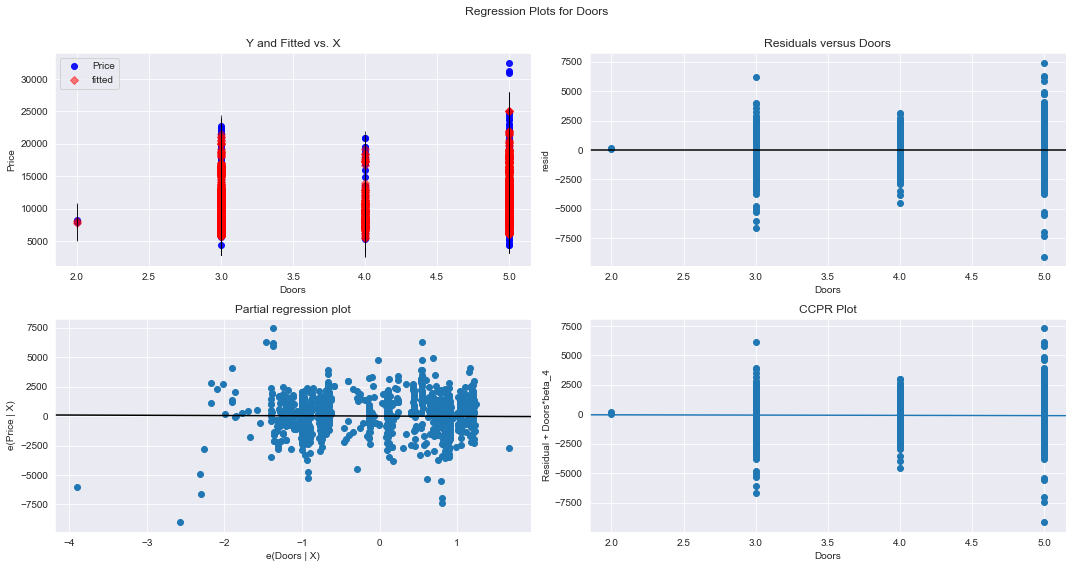

In [151]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


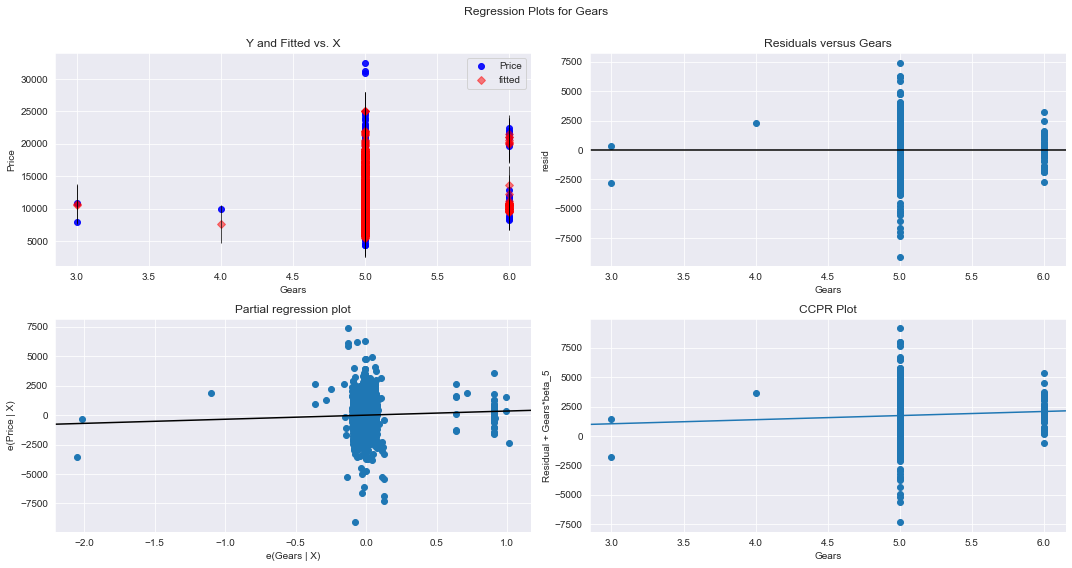

In [152]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


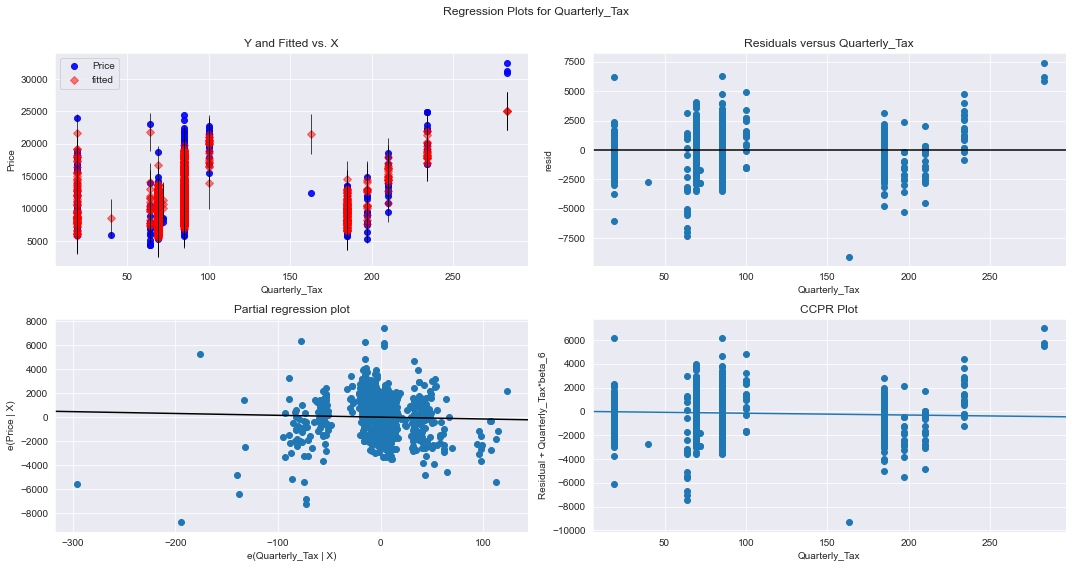

In [153]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


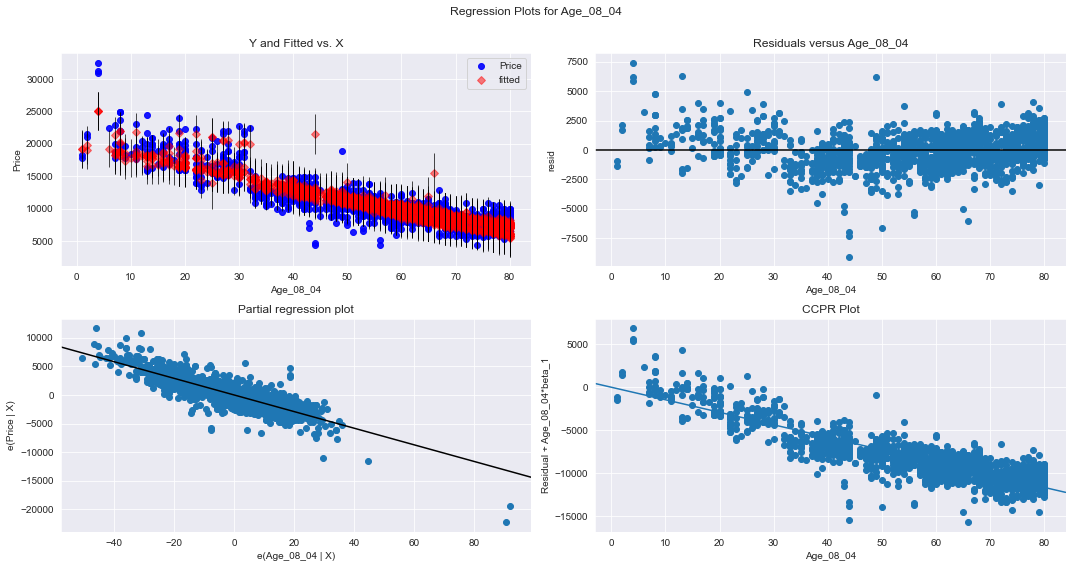

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


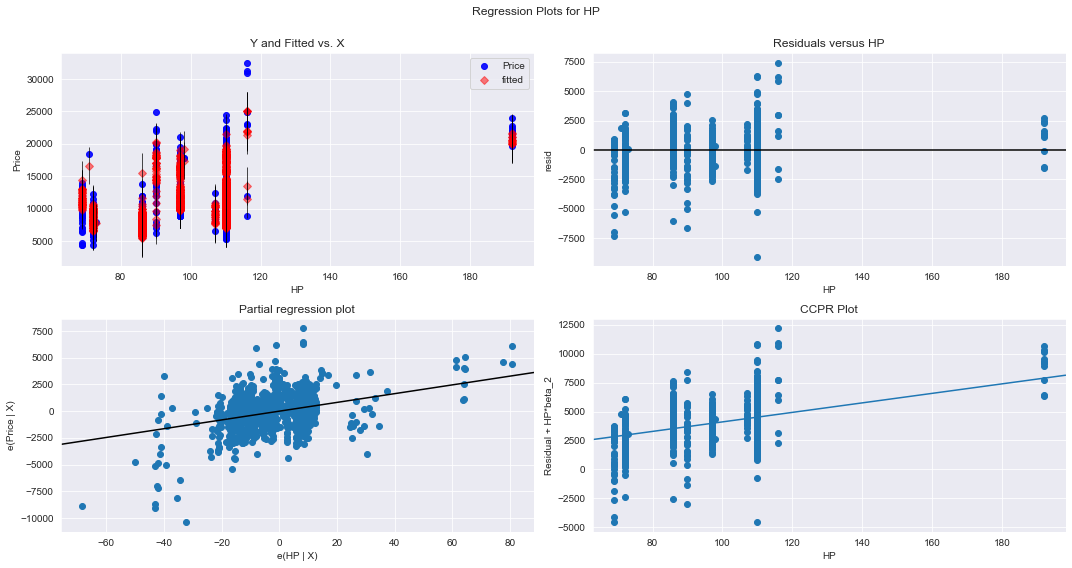

In [155]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


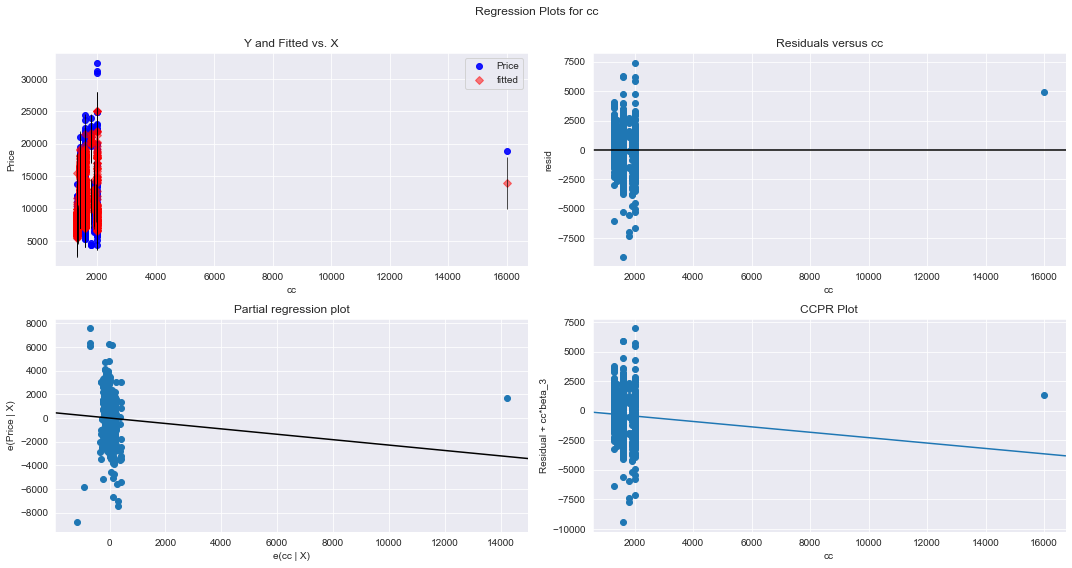

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


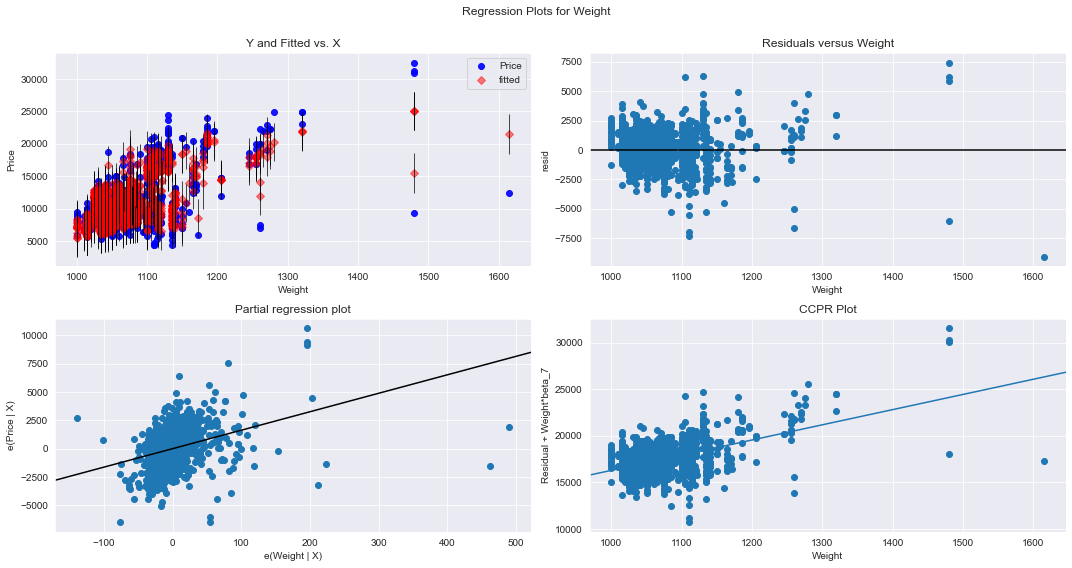

In [157]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [158]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [159]:
c

array([4.56338725e-03, 3.78096978e-03, 2.78692335e-03, ...,
       3.14769692e-04, 1.49919551e-07, 2.25381467e-03])

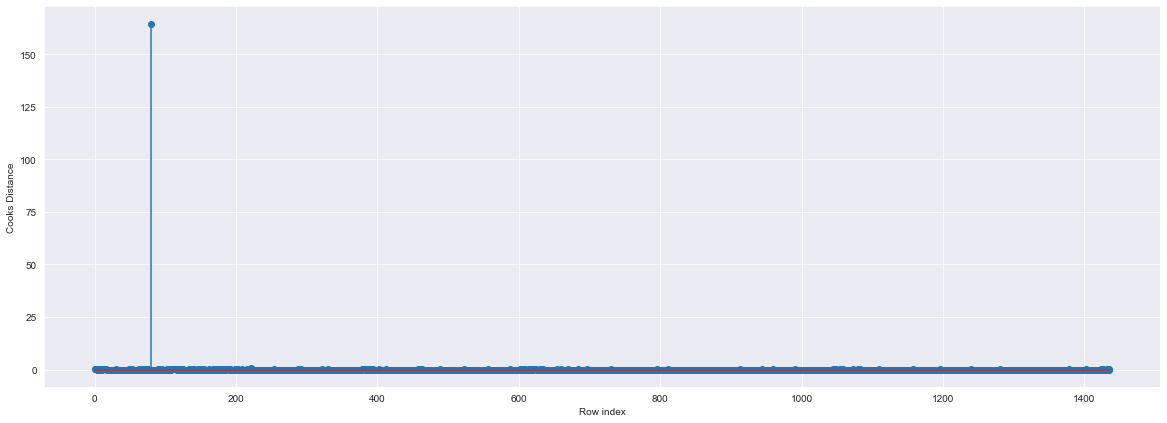

In [160]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [161]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 164.568482826904)

## High Influence points

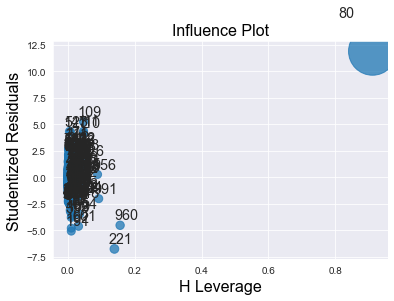

In [162]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [163]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [164]:
leverage_cutoff

0.020891364902506964

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [165]:
df[df.index.isin([80,960,221])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [192]:
#See the differences in HP and other variable values
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [193]:
df.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


# Improving the model

In [194]:
#Load the data
df_new = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [195]:
cols = [2,3,6,8,12,13,15,16,17]
df_new1 = df_new[df_new.columns[cols]]


In [196]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new1.drop(df_new1.index[[80]],axis=0).reset_index()

In [197]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [198]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [199]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()

In [200]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8514958599400064, 24869.410481979066)

In [201]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()

In [202]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8514958599400064, 24869.410481979066)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [203]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

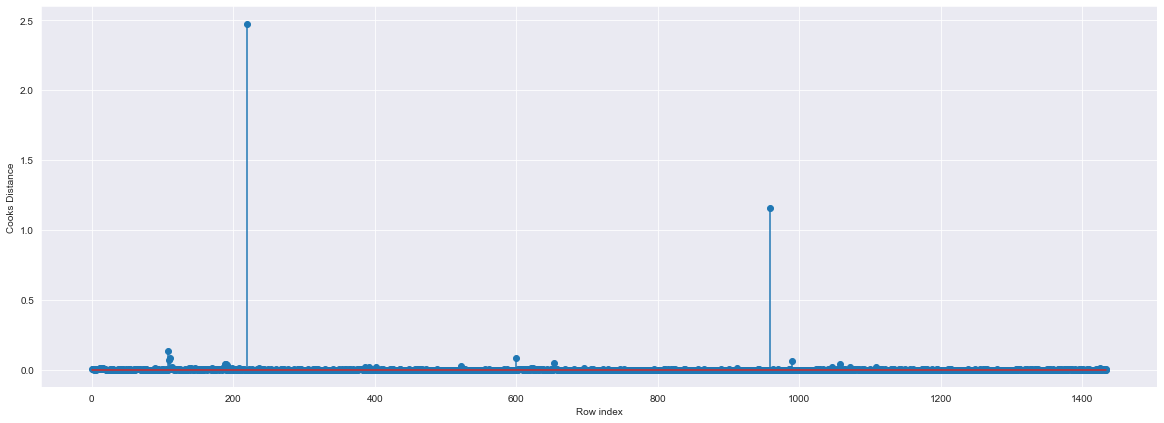

In [204]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [213]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.4745818290751376)

In [214]:
#Drop 76 and 77 observations
df2=df1.drop(df1.index[[220]],axis=0)

In [215]:
df3=df2.reset_index()

In [216]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df3).fit()

In [217]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1263.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:39:23   Log-Likelihood:                -12370.
No. Observations:                1434   AIC:                         2.476e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9612.3542   1486.873     -6.465      0.000   -1.25e+04   -6695.661
Age_08_04      -133.8206      2.327    -57.497      0.000    -138.386    -129.255
HP               50.0183      2.888     17.321      0.000      44.354      55.683
cc               -4.4622      0.311    -14.366      0.000      -5.072      -3.853
Doors           -94.9247     40.603     -2.338      0.020    -174.572     -15.278
Gears           262.3878    198.167      1.324      0.186    -126.343     651.119
Quarterly_Tax     6.1226      1.467      4.174      0.000       3.245       9.000
Weight           26.3739      1.260     20.938      0.000      23.903      28.845
==============================================================================
Omnibus:                      192.435   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.165
Skew:                          -0.404   Prob(JB):                    8.73e-290
Kurtosis:                       7.650   Cond. No.                     7.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

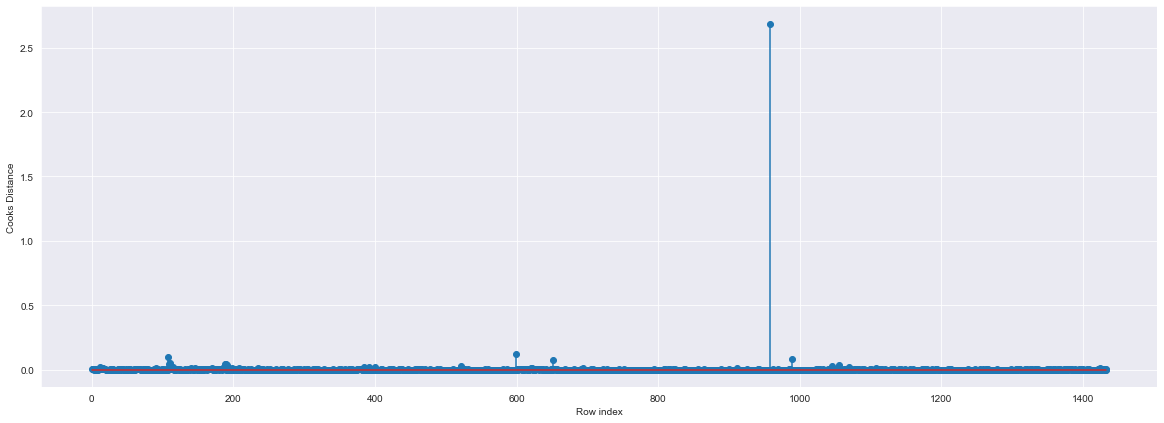

In [219]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [220]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(958, 2.6883896594837866)

In [221]:
df4=df3.drop(df3.index[[958]],axis=0)

In [222]:
df5=df4.reset_index()

In [223]:
final_ml_V= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df5).fit()

In [224]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1351.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:41:17   Log-Likelihood:                -12320.
No. Observations:                1433   AIC:                         2.466e+04
Df Residuals:                    1425   BIC:                         2.470e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.428e+04   1529.565     -9.336      0.000   -1.73e+04   -1.13e+04
Age_08_04      -128.7978      2.325    -55.398      0.000    -133.358    -124.237
HP               47.0514      2.824     16.664      0.000      41.513      52.590
cc               -5.0523      0.308    -16.384      0.000      -5.657      -4.447
Doors          -153.6981     39.949     -3.847      0.000    -232.064     -75.333
Gears           245.3905    192.519      1.275      0.203    -132.261     623.042
Quarterly_Tax     3.2997      1.457      2.265      0.024       0.441       6.158
Weight           32.1475      1.373     23.416      0.000      29.454      34.841
==============================================================================
Omnibus:                       96.721   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.733
Skew:                          -0.165   Prob(JB):                     3.18e-86
Kurtosis:                       5.547   Cond. No.                     8.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [225]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

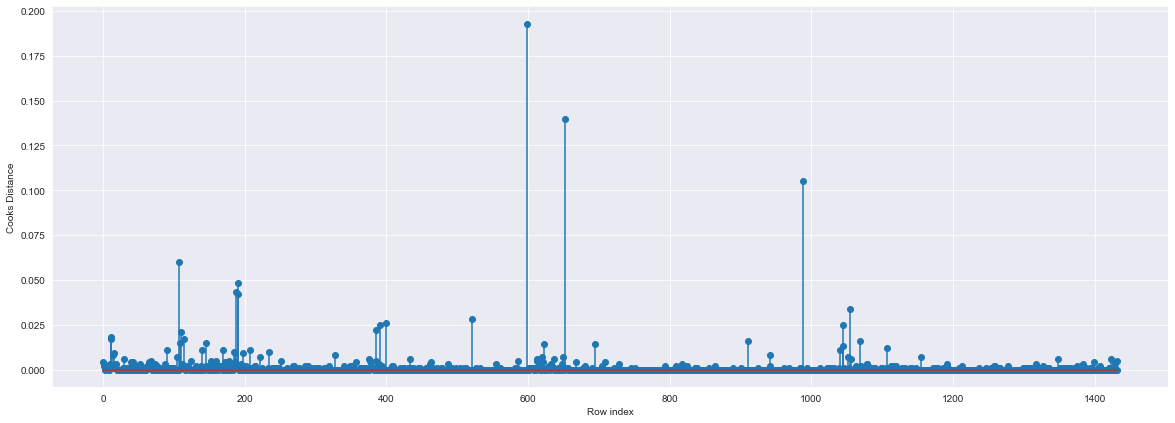

In [226]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [227]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df5).fit()

In [228]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8690184277561646, 24656.485640654686)

## Predicting for new data

In [229]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [230]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':25,"HP":95,"cc":1500,"Doors":5,"Gears":5,"Quarterly_Tax":200 ,"Weight": 1000},index=[1])

In [231]:
new_data

,Age_08_04,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,25,95,1500,5,5,200,1000


In [232]:
final_ml_V.predict(new_data)

1    12657.827359
dtype: float64

In [233]:
final_ml_V.predict(df_new.iloc[0:5,])

0    15798.763562
1    15798.763562
2    15669.965785
3    15412.370233
4    15057.916796
dtype: float64

In [238]:
df_new1.iloc[0:5,]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [239]:
pred_y = final_ml_V.predict(df_new1)

In [240]:
pred_y

0       15798.763562
1       15798.763562
2       15669.965785
3       15412.370233
4       15057.916796
            ...     
1431     8256.536157
1432     7548.667491
1433     7677.465268
1434     7806.263044
1435     9357.247939
Length: 1436, dtype: float64